In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def generate_test_signal(p=1):
    x = np.linspace(-np.pi, np.pi, 256*p)
    signal = np.sin(x)
    noise = np.random.normal(0, 1, 256*p)
    return signal+noise

In [1]:
def get_next(x_in, y_last, alpha):
    assert 0 <= alpha < 1, "alpha is not valid"
    return alpha*y_last + (1-alpha)*x_in

In [23]:
def filtering(in_signal, alpha):
    assert len(in_signal.shape) == 1, "input must be 1-D"
    length = in_signal.shape[0]
    out_signal = np.zeros(length)
    
    for i in range(length):
        if i == 0:
            out_signal[i] = in_signal[i]
            continue    
        out_signal[i] = get_next(in_signal[i], out_signal[i-1], alpha)
    
    return out_signal

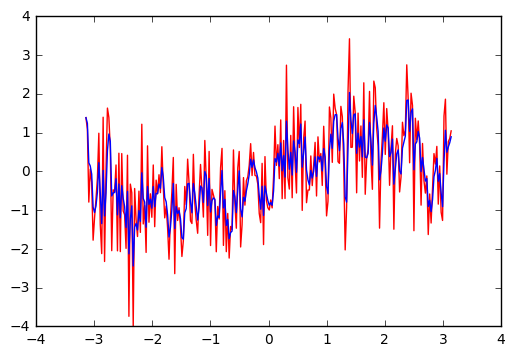

In [33]:
x = np.linspace(-np.pi, np.pi, 256*1)
signal = generate_test_signal(1)
processed_signal = filtering(signal, 0.5)
plt.plot(x, signal, 'r')
plt.plot(x, processed_signal, 'b') 
plt.show()